In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Let's read the data...
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#..and create a new data frame in case we want later on
# to work with the initial dataframe
train = train_data.copy()
test = test_data.copy()

In [9]:
#train.info()

In [22]:
columns = ['GrLivArea', 'SalePrice']
play_dataset = pd.DataFrame(train, columns=columns)
#play_dataset
play_dataset['GrLivArea'].corr(play_dataset['SalePrice'])

0.7086244776126523

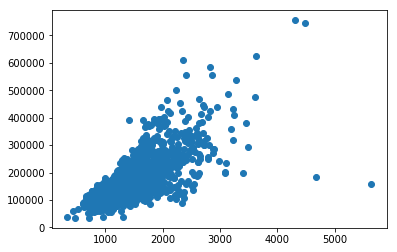

In [20]:
plt.scatter(play_dataset['GrLivArea'], play_dataset['SalePrice'])

In [24]:
small_dataset = play_dataset[:20]

In [26]:
small_dataset['GrLivArea'].corr(small_dataset['SalePrice'])

0.6769087401125173

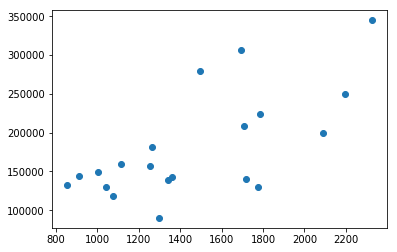

In [27]:
plt.scatter(small_dataset['GrLivArea'], small_dataset['SalePrice'])

In [28]:
# Lets fit a regression line to the above dataset
from sklearn.linear_model import LinearRegression

In [37]:
#small_dataset['GrLivArea'].values.reshape(-1, 1)

In [38]:
#small_dataset['SalePrice'].shape

In [41]:
X = small_dataset['GrLivArea'].values.reshape(-1, 1)
y = small_dataset['SalePrice'].values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(X, y)


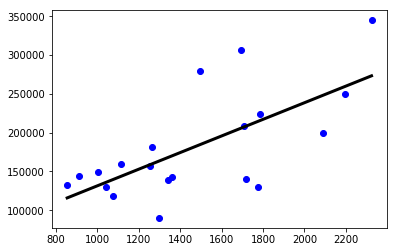

In [45]:
prediction_space = np.linspace(min(X), 
                               max(X)).reshape(-1, 1)
plt.scatter(X, y, color='blue') 
plt.plot(prediction_space, lm.predict(prediction_space), 
         color='black', linewidth=3) 
plt.show()